In [1]:
import pprint
import psutil
import json

from evaluator import define_fitness_calculator
from utils import *

process = psutil.Process()

In [2]:
optimization_folder = "20250122-112259"
config_optimisation = "./param/config_optimisation"

In [3]:
with open(config_optimisation) as f:
    opt_config = json.load(f)
fitness_calculator = define_fitness_calculator(opt_config)

In [4]:
for data_store in get_data_stores(optimization_folder):
    print()
    print(f"Memory usage before: {process.memory_info().rss / 1024**3}Gb") 
    scores = fitness_calculator.calculate_scores(data_store)
    print(f"Memory usage after: {process.memory_info().rss / 1024**3}Gb") 
    print("Scores: ", scores)

Reading folder ./20250122-112259[param_spont.defaults]CombinationParamSearch{pynn_seed:[1]}/SelfSustainedPushPull_ParameterSearch_____pynn_seed:1

Memory usage before: 0.2812004089355469Gb
For feature SpontActivityTarget_V1_Exc_L4, for value 1.6147 computed score 0.00
For feature SpontActivityTarget_V1_Inh_L4, for value 8.2146 computed score 0.00
For feature SpontActivityTarget_V1_Exc_L2/3, for value 2.5803 computed score 0.00
For feature SpontActivityTarget_V1_Inh_L2/3, for value 7.3444 computed score 0.00


/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


For feature IrregularityTarget_V1_Exc_L4, for value 0.9078 computed score 0.92
For feature IrregularityTarget_V1_Inh_L4, for value 0.9478 computed score 0.52
For feature IrregularityTarget_V1_Exc_L2/3, for value 0.9171 computed score 0.83
For feature IrregularityTarget_V1_Inh_L2/3, for value 0.9542 computed score 0.46


/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


For feature SynchronyTarget_V1_Exc_L4, for value 0.0012 computed score 0.12
For feature SynchronyTarget_V1_Inh_L4, for value 0.0019 computed score 0.19
For feature SynchronyTarget_V1_Exc_L2/3, for value 0.0041 computed score 0.41


NeuronAnnotationsToPerNeuronValues analysis took: 0.18399691581726074 seconds


For feature SynchronyTarget_V1_Inh_L2/3, for value 0.0163 computed score 1.63
For feature OrientationTuningPreferenceTarget_V1_Exc_L4, for value 8.3564 dimensionless computed score 0.00
For feature OrientationTuningPreferenceTarget_V1_Inh_L4, for value 4.6978 dimensionless computed score 0.60 dimensionless
For feature OrientationTuningPreferenceTarget_V1_Exc_L2/3, for value 6.4852 dimensionless computed score 0.00
For feature OrientationTuningPreferenceTarget_V1_Inh_L2/3, for value 3.2060 dimensionless computed score 3.59 dimensionless
For feature OrientationTuningOrthoHighTarget_V1_Exc_L4, for value 0.0744 dimensionless computed score 0.25 dimensionless
For feature OrientationTuningOrthoHighTarget_V1_Inh_L4, for value 0.2863 dimensionless computed score 0.95 dimensionless
For feature OrientationTuningOrthoHighTarget_V1_Exc_L2/3, for value 0.0836 dimensionless computed score 0.28 dimensionless
For feature OrientationTuningOrthoHighTarget_V1_Inh_L2/3, for value 0.9582 dimensionless comp

In [5]:
print(sum(scores.values()))

19.08363253437404 dimensionless


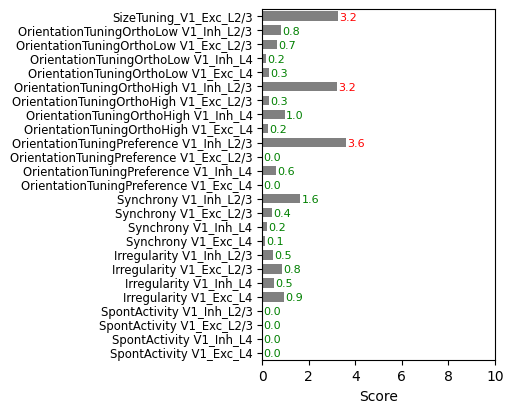

In [9]:
score = [float(s) for s in scores.values()]
scores_names = [s.replace("Target_", " ") for s in scores.keys()]
pos = [*range(len(score))]

fig, axs = plt.subplots(1, figsize=(3, 0.8 + 0.150 * len(pos)), squeeze=False)

axs[0, 0].barh(pos, score, height=0.7, align="center", color="gray")

for p, s in zip(pos, score):
    if s > 2:
        axs[0, 0].text(s + 0.05, p - 0.25, s="{:.1f}".format(s), color="red", fontsize=8)
    if s < 2:
        axs[0, 0].text(s + 0.05, p - 0.25, s="{:.1f}".format(s), color="green", fontsize=8)

axs[0, 0].set_xlabel("Score")

axs[0, 0].set_yticks(pos)
axs[0, 0].set_yticklabels(scores_names, size="small")

axs[0, 0].set_xlim(0, 10)
axs[0, 0].set_ylim(-0.5, len(pos) - 0.5)

#plt.savefig(f"./{optimization_folder}/scores.png", dpi=100, bbox_inches="tight", transparent=True)
plt.show()